In [1]:
pip install opencv-python numpy scikit-learn


  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.4/38.1 MB 12.6 MB/s eta 0:00:03
   - -------------------------------------- 1.3/38.1 MB 11.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.1/38.1 MB 15.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.9/38.1 MB 15.3 MB/s eta 0:00:03
   ---- ----------------------------------- 3.8/38.1 MB 16.3 MB/s eta 0:00:03
   ----- ---------------------------------- 4.9/38.1 MB 17.6 MB/s eta 0:00:02
   ------ --------------------------------- 6.0/38.1 MB 18.2 MB/s eta 0:00:02
   ------- -------------------------------- 7.0/38.1 MB 18.7 MB/s eta 0:00:02
   -------- ------------------------------- 7.7/38.1 MB 18.9 MB/s eta 0:00:02
   ----

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans


In [4]:

# Resize the image if needed
# image = cv2.resize(image, (width, height))
desktop_path = "C:/Users/Paridhi Gupta/OneDrive/Documents/img2.jpg"
image = cv2.imread(desktop_path)



In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



In [6]:
pixels = image.reshape((-1, 3))



In [7]:

# Define the number of clusters (prominent colors)
k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to 10
kmeans.fit(pixels)



KMeans(n_clusters=5, n_init=10)

In [48]:
colors = kmeans.cluster_centers_.astype(int)

In [49]:
for color in colors:
    print(f"RGB: {tuple(color)}")

RGB: (207, 227, 225)
RGB: (106, 162, 121)
RGB: (157, 197, 158)
RGB: (54, 101, 77)
RGB: (244, 215, 14)


In [50]:
import matplotlib.pyplot as plt


In [51]:
dominant_color = max(colors, key=lambda x: sum(x))
print(f"Dominant Color: {tuple(dominant_color)}")

# You can define criteria to filter or process specific colors.
filtered_colors = [color for color in colors if sum(color) > 100]


Dominant Color: (207, 227, 225)


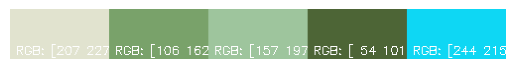

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have the 'colors' list from a previous code block

# Determine the size of the color scale
scale_width = 100
scale_height = 50

# Create a color scale image
color_scale = np.zeros((scale_height, len(colors) * scale_width, 3), dtype=np.uint8)

# Create color swatches and display RGB values
for i, color in enumerate(colors):
    start_x = i * scale_width
    end_x = (i + 1) * scale_width
    color_rgb = tuple(reversed(color))  # Convert BGR to RGB
    color_rgb = tuple(map(int, color_rgb))  # Ensure that color_rgb elements are integers
    cv2.rectangle(color_scale, (start_x, 0), (end_x, scale_height), color_rgb, -1)  # Draw a filled rectangle
    cv2.putText(color_scale, f'RGB: {color}', (start_x + 5, scale_height - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# Display the color scale
plt.imshow(color_scale)
plt.axis('off')
plt.show()
